This code is to build a data story for the online retail dataset and find non-obvious insights 

In [1]:
import pandas as pd 
import pylab as pl 
import seaborn as sbn 
import numpy as np
import time
start_time = time.time()

Next, import the file

In [2]:
print "Reading files..."
excel_file = '../data/transactions.csv'
df = pd.read_csv(excel_file, nrows = 10000000)

Reading files...


Generate Values of billed items

In [3]:
def func(number1,number2):
    return number1 * number2

print ("Creating price values...")
df['Value'] = df.apply(lambda x: func(x['UnitPrice'], x['Quantity']), axis=1)

Creating price values...


Groupby invoice number to get the pattern in the bills and find the total value of the bills

In [4]:
sum_value = df.groupby(['InvoiceNo']).sum()['Value']

Separate the invoices into fulfilled and cancelled orders. In the dataset, (-) denotes returned items.

Text(0,0.5,'Number of invoices')

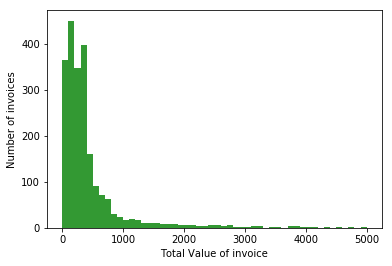

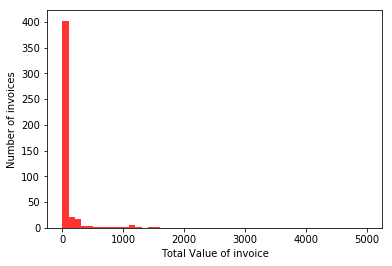

In [8]:
sum_value_ful = sum_value[sum_value > 0]
sum_value_can = sum_value[sum_value < 0]
pl.hist(sum_value_ful, range(0,5001, 100), color = 'green', alpha = 0.8)
pl.xlabel('Total Value of invoice')
pl.ylabel('Number of invoices')
pl.figure(2)
pl.hist(abs(sum_value_can), range(0,5001, 100), color = 'red', alpha = 0.8)
pl.xlabel('Total Value of invoice')
pl.ylabel('Number of invoices')

One immediate observation is that the values of returned invoices is in general much lower than the bought invoices. This is to be expected as in general only the items that are not wanted are returned. So no surprises here!

Next step is to see the kind of items by price in the returned and the fulfilled orders. 

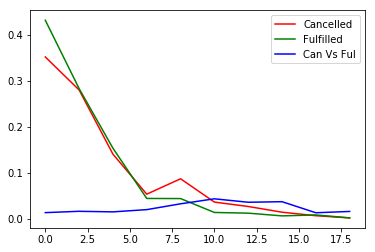

In [12]:
can_df = df[df['Value'] < 0]
can_df = can_df[can_df['Value'] > -70000]
cana, canb = np.histogram(abs(can_df['UnitPrice']), range(0,100,2))

ful_df = df[df['Value'] > 0]
ful_df = ful_df[ful_df['Value'] < 70000]
fula, fulb = np.histogram(ful_df['UnitPrice'], range(0,100,2))

pl.figure(3)
pl.plot(canb[:10], cana[:10]/(sum(cana[:10])*1.0), color = 'red', label = 'Cancelled')
pl.plot(fulb[:10], fula[:10]/(sum(fula[:10])*1.0), color = 'green', label = 'Fulfilled')
pl.plot(canb[:10], (cana[:10]/(fula[:10]*1.0)), color = 'blue', label = 'Can Vs Ful')
pl.legend()

In the above analysis, only the unit prices for which there is substantial data is seen. As can be seen immediately, for prices above $6, the cancelled items' proportion is more than that of fulfilled. So which in essence could mean that the cancelled items are more likely to be returned in this price range. 

As the number of cancelled orders are not much, next it would be interesting to do the association analysis with the kind of products that are frequently bought together in the fulfilled orders. 